In [1]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

n = pypsa.Network()
n.import_from_netcdf(path="../FYP-TZ-APG-Hydrogen-Integration/TZ-APG v1/tz-apg-v1_scenario-bau.nc")

INFO:pypsa.network.io:Imported network '' has buses, carriers, generators, global_constraints, links, loads, storage_units


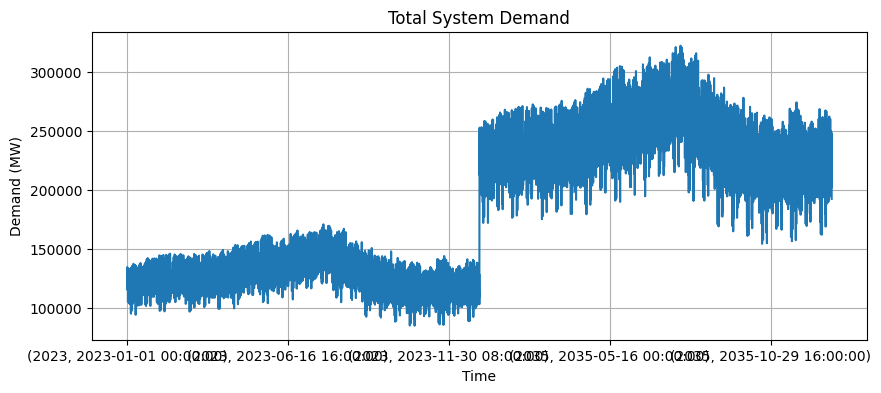

In [2]:
# Get the demand/load time series
df = n.loads_t.p  # MW per load

total_demand = df.sum(axis=1)
total_demand.plot(figsize=(10, 4))
plt.title("Total System Demand")
plt.xlabel("Time")
plt.ylabel("Demand (MW)")
plt.grid(True)
plt.show()

INFO:pypsa.network.io:Imported network '' has buses, carriers, generators, global_constraints, links, loads, storage_units


[(2023, Timestamp('2023-01-01 00:00:00')), (2023, Timestamp('2023-01-01 02:00:00')), (2023, Timestamp('2023-01-01 04:00:00')), (2023, Timestamp('2023-01-01 06:00:00')), (2023, Timestamp('2023-01-01 08:00:00')), (2023, Timestamp('2023-01-01 10:00:00')), (2023, Timestamp('2023-01-01 12:00:00')), (2023, Timestamp('2023-01-01 14:00:00')), (2023, Timestamp('2023-01-01 16:00:00')), (2023, Timestamp('2023-01-01 18:00:00')), (2023, Timestamp('2023-01-01 20:00:00')), (2023, Timestamp('2023-01-01 22:00:00')), (2023, Timestamp('2023-01-02 00:00:00')), (2023, Timestamp('2023-01-02 02:00:00')), (2023, Timestamp('2023-01-02 04:00:00')), (2023, Timestamp('2023-01-02 06:00:00')), (2023, Timestamp('2023-01-02 08:00:00')), (2023, Timestamp('2023-01-02 10:00:00')), (2023, Timestamp('2023-01-02 12:00:00')), (2023, Timestamp('2023-01-02 14:00:00')), (2023, Timestamp('2023-01-02 16:00:00')), (2023, Timestamp('2023-01-02 18:00:00')), (2023, Timestamp('2023-01-02 20:00:00')), (2023, Timestamp('2023-01-02 22:0

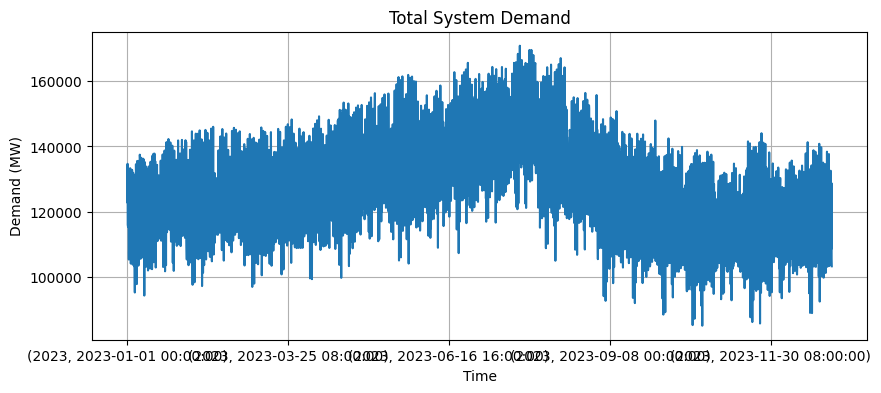

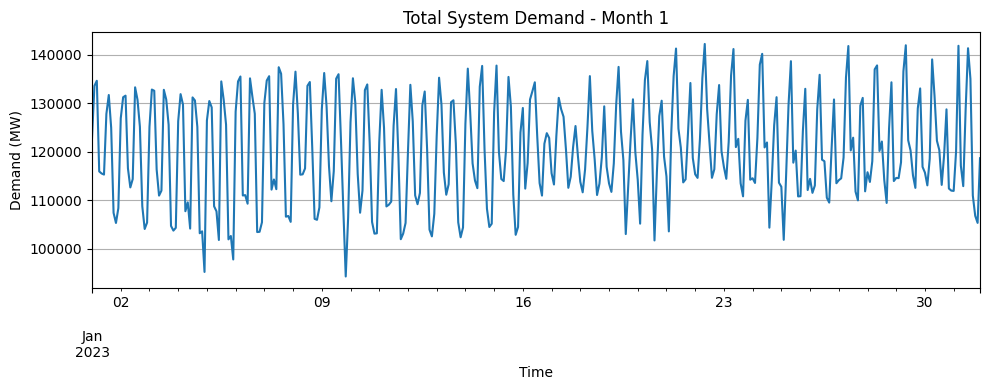

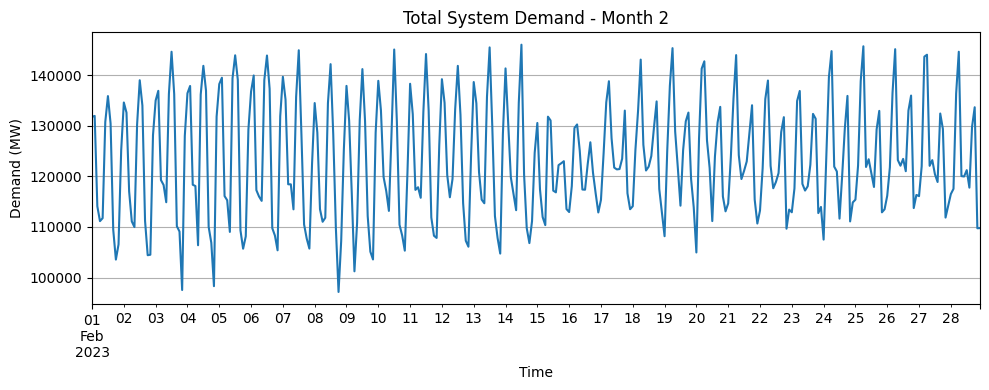

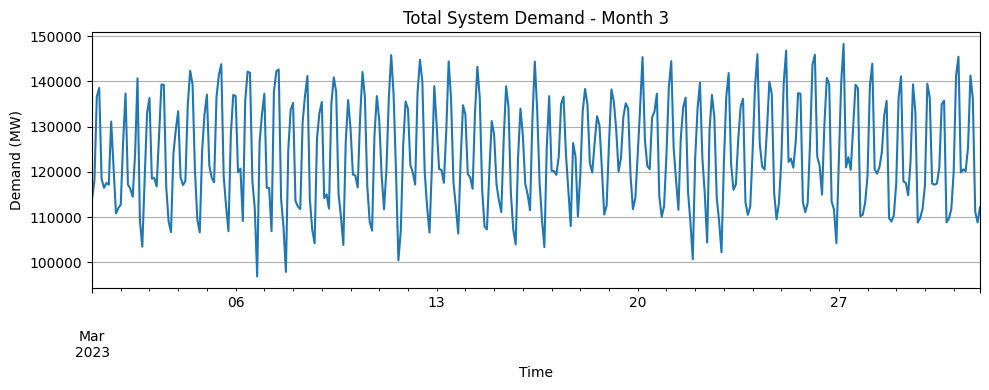

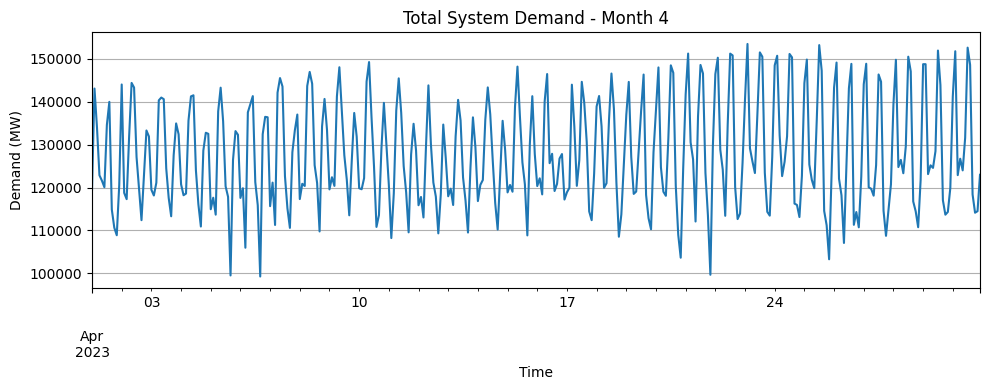

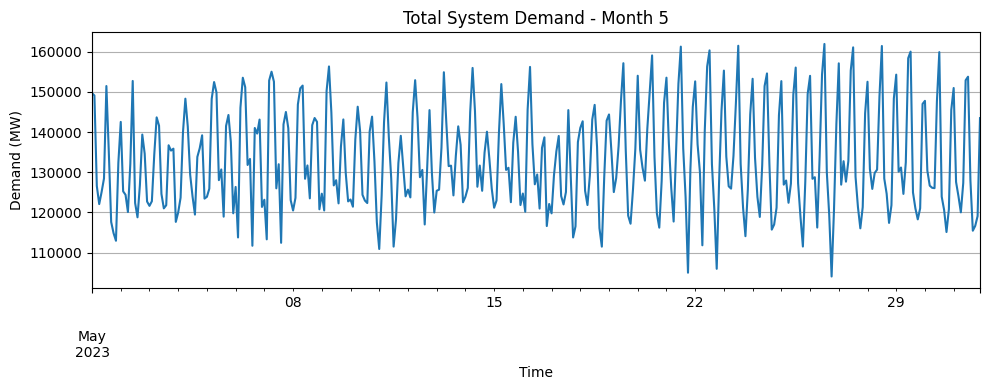

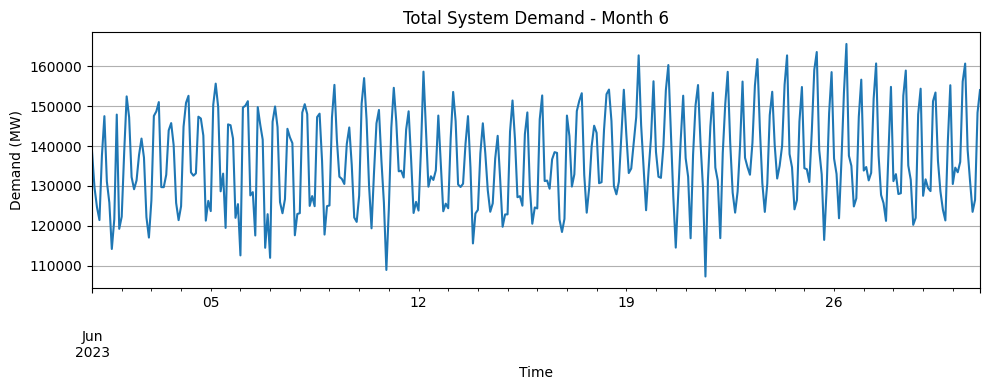

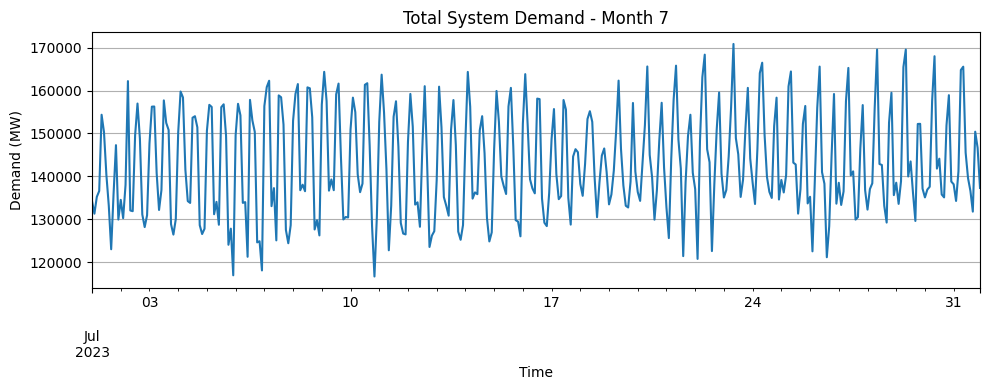

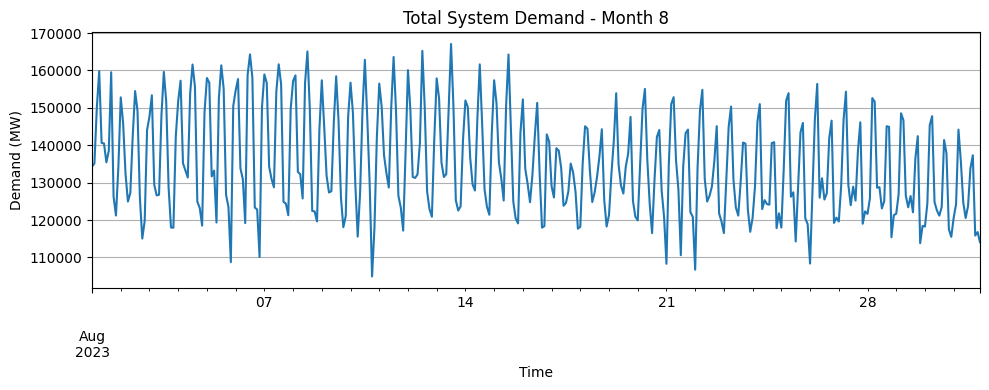

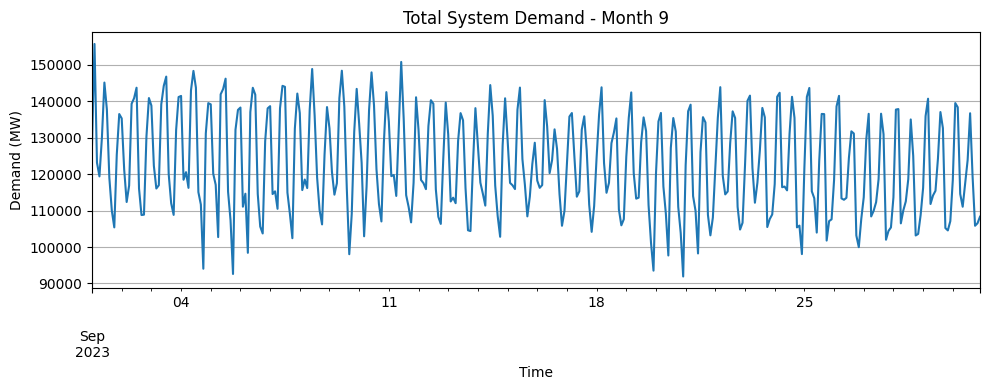

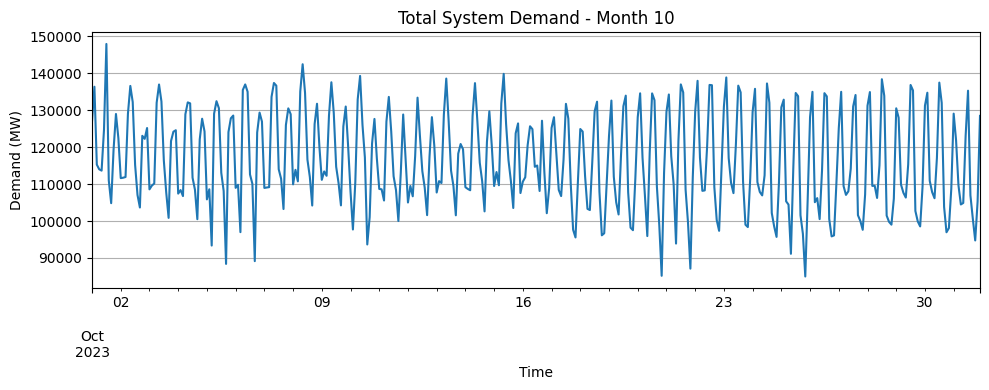

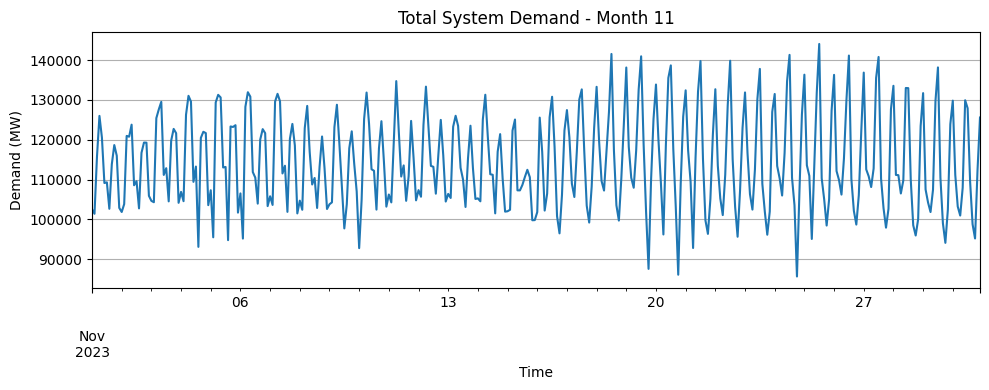

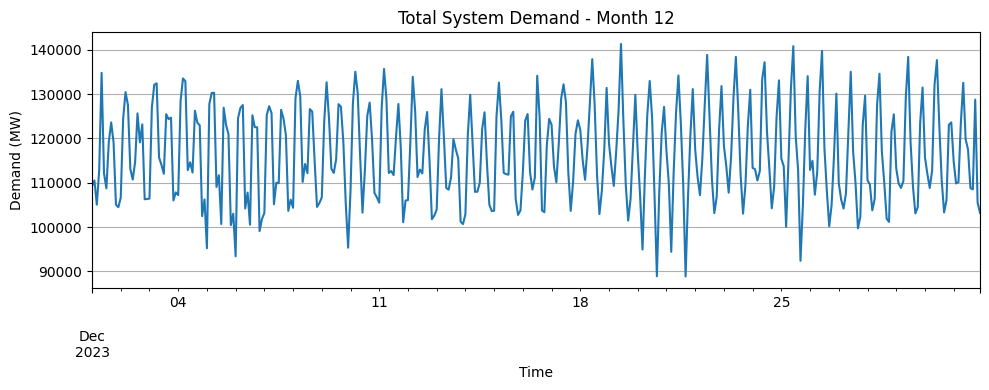

In [3]:
n = pypsa.Network()
n.import_from_netcdf(path="../FYP-TZ-APG-Hydrogen-Integration/TZ-APG v1/tz-apg-v1_scenario-bau.nc")

# User inputs
start_year = 2023
start_week = 1
period_length_weeks = 52  # how many weeks to include

# Get all snapshots for the chosen year
year_snapshots = [s for s in n.snapshots if s[0] == start_year]

# Filter snapshots within the chosen period
selected_snapshots = []
for s in year_snapshots:
    timestamp = pd.to_datetime(s[1])
    week_number = timestamp.isocalendar()[1]
    if start_week <= week_number < start_week + period_length_weeks:
        selected_snapshots.append(s)

print(selected_snapshots)

# Set the filtered snapshots
n.set_snapshots(pd.MultiIndex.from_tuples(selected_snapshots, names=['period', 'snapshot']))

# n.optimize(n.snapshots[::6]);  
# Get the demand/load time series
df = n.loads_t.p  # MW per load

total_demand = df.sum(axis=1)
total_demand.plot(figsize=(10, 4))
plt.title("Total System Demand")
plt.xlabel("Time")
plt.ylabel("Demand (MW)")
plt.grid(True)
plt.show()

# Compute total system demand
total_demand = df.sum(axis=1)

# Extract timestamps from MultiIndex
if isinstance(total_demand.index, pd.MultiIndex):
    timestamps = total_demand.index.get_level_values(1)  # second level is the actual timestamp
else:
    timestamps = total_demand.index

total_demand.index = pd.to_datetime(timestamps)

# Loop through each month and plot
for month in range(1, 13):
    monthly_demand = total_demand[total_demand.index.month == month]
    
    if monthly_demand.empty:
        continue  # skip months that have no data
    
    fig, ax = plt.subplots(figsize=(10, 4))
    monthly_demand.plot(ax=ax)
    
    ax.set_title(f"Total System Demand - Month {month}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Demand (MW)")
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()

INFO:pypsa.network.io:Imported network '' has buses, carriers, generators, global_constraints, links, loads, storage_units


[(2035, Timestamp('2035-01-01 00:00:00')), (2035, Timestamp('2035-01-01 02:00:00')), (2035, Timestamp('2035-01-01 04:00:00')), (2035, Timestamp('2035-01-01 06:00:00')), (2035, Timestamp('2035-01-01 08:00:00')), (2035, Timestamp('2035-01-01 10:00:00')), (2035, Timestamp('2035-01-01 12:00:00')), (2035, Timestamp('2035-01-01 14:00:00')), (2035, Timestamp('2035-01-01 16:00:00')), (2035, Timestamp('2035-01-01 18:00:00')), (2035, Timestamp('2035-01-01 20:00:00')), (2035, Timestamp('2035-01-01 22:00:00')), (2035, Timestamp('2035-01-02 00:00:00')), (2035, Timestamp('2035-01-02 02:00:00')), (2035, Timestamp('2035-01-02 04:00:00')), (2035, Timestamp('2035-01-02 06:00:00')), (2035, Timestamp('2035-01-02 08:00:00')), (2035, Timestamp('2035-01-02 10:00:00')), (2035, Timestamp('2035-01-02 12:00:00')), (2035, Timestamp('2035-01-02 14:00:00')), (2035, Timestamp('2035-01-02 16:00:00')), (2035, Timestamp('2035-01-02 18:00:00')), (2035, Timestamp('2035-01-02 20:00:00')), (2035, Timestamp('2035-01-02 22:0

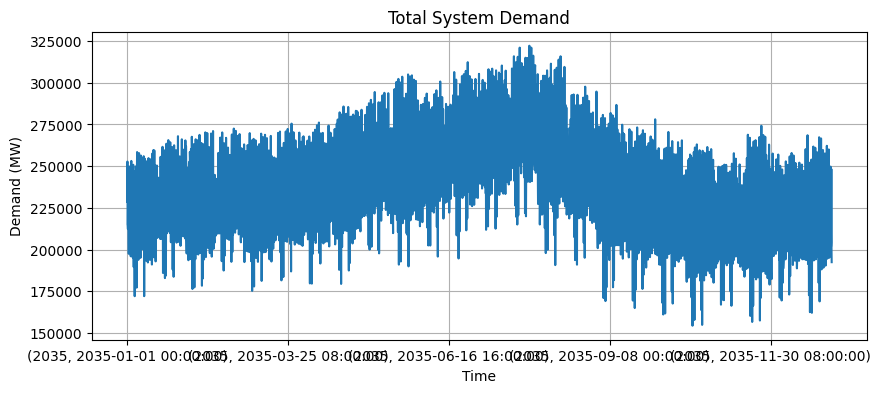

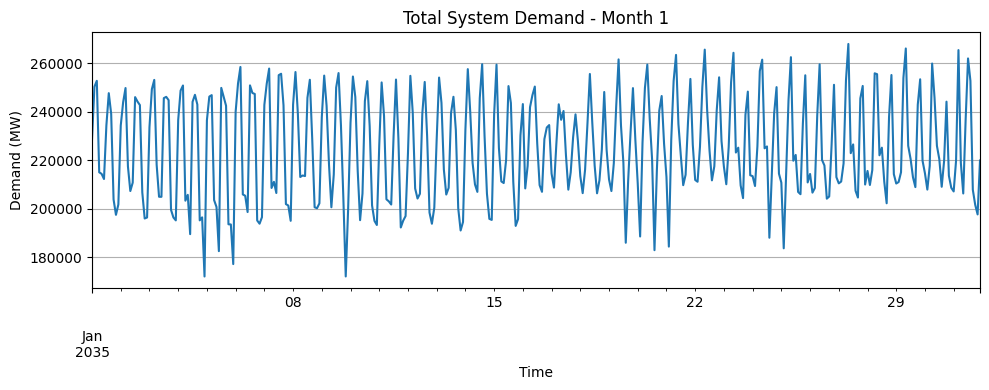

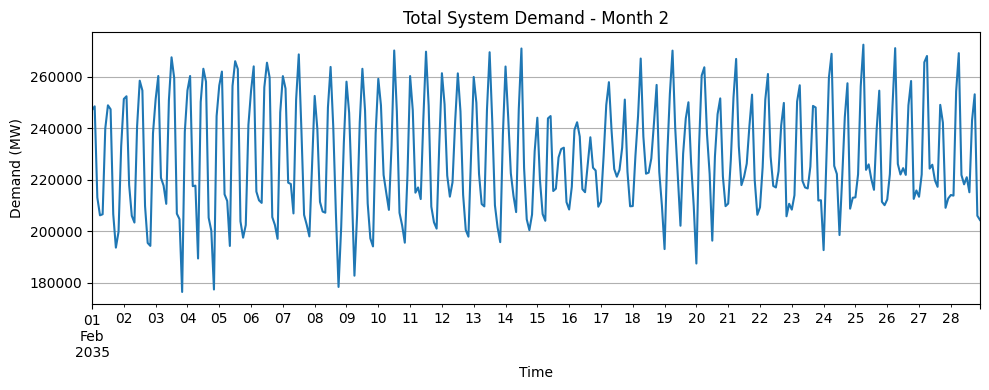

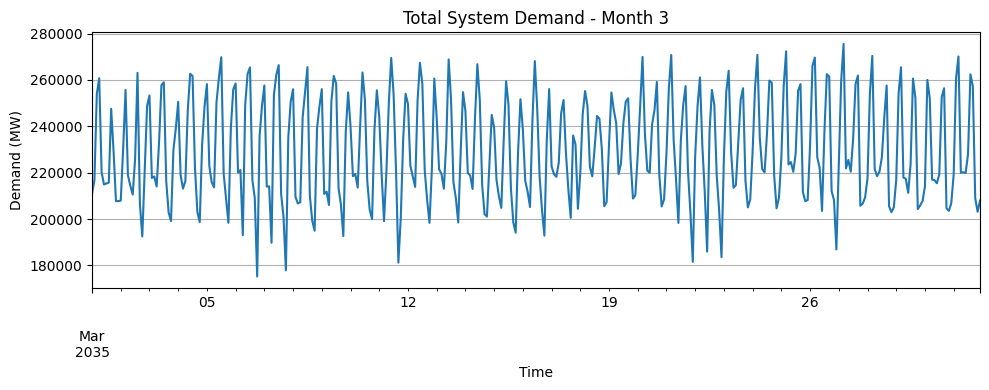

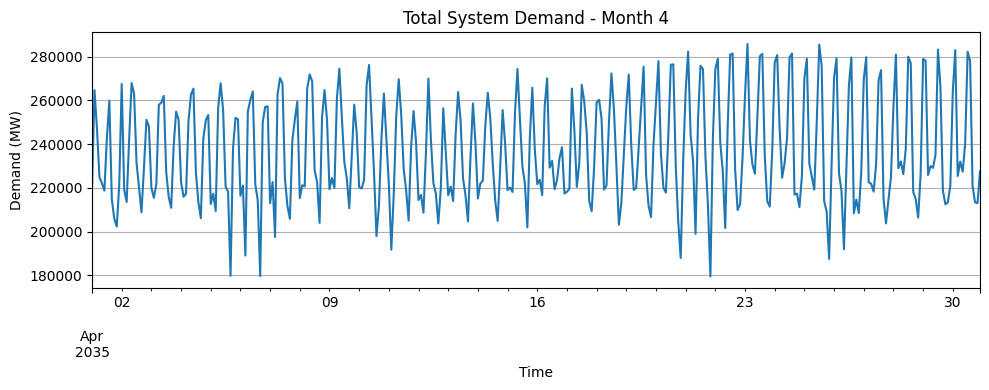

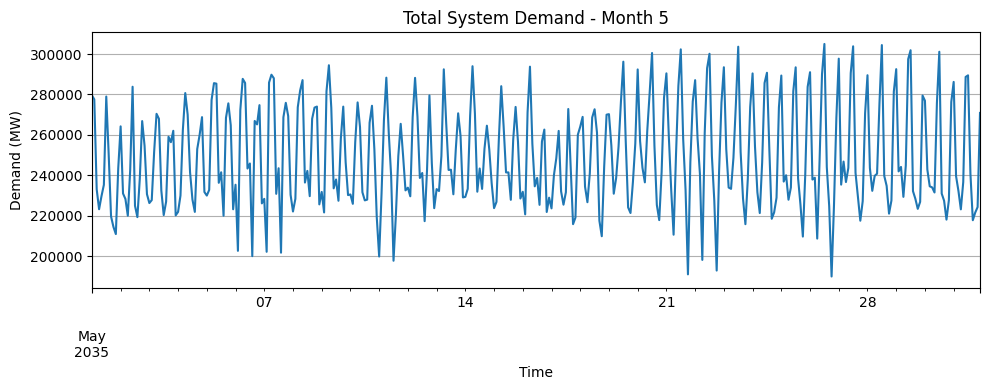

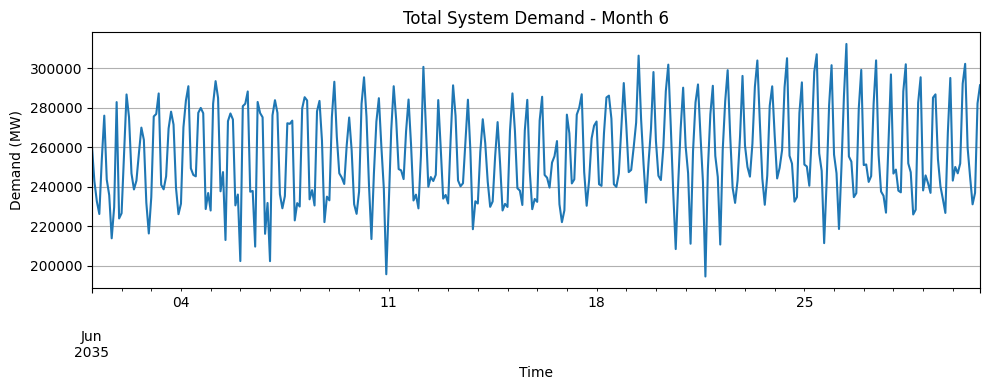

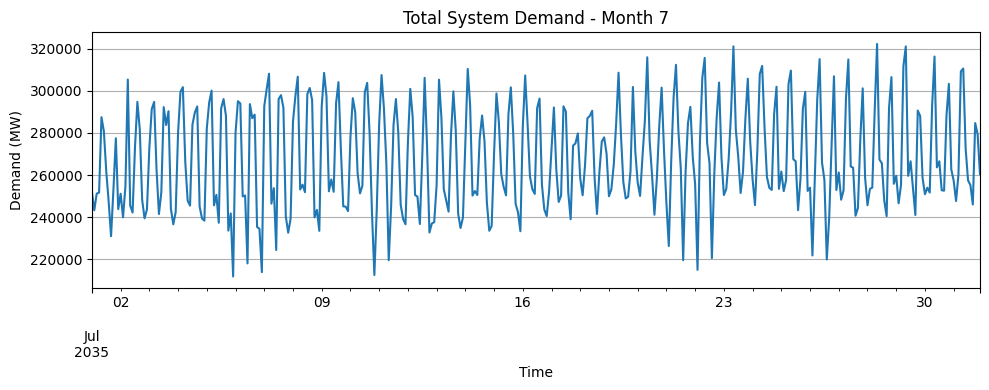

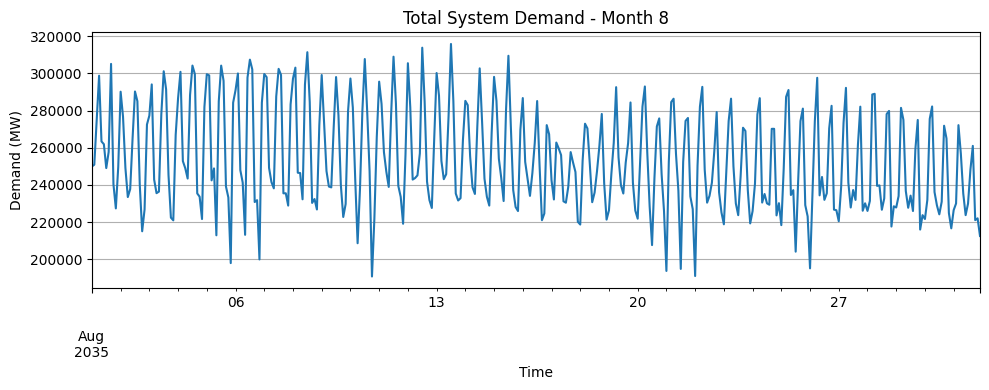

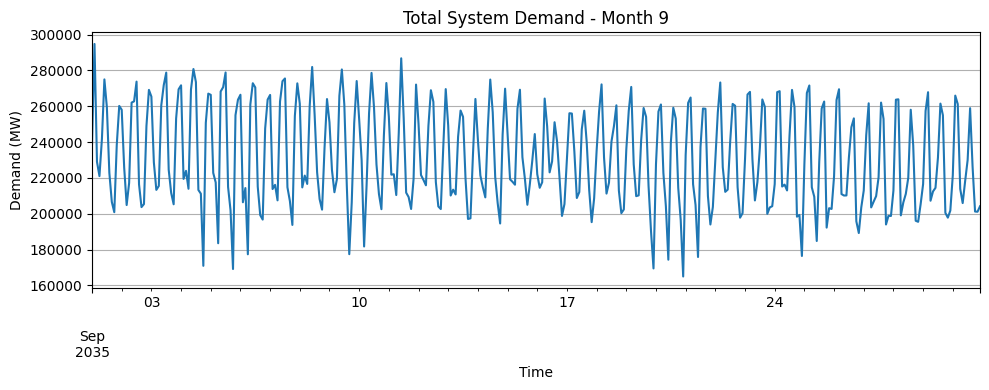

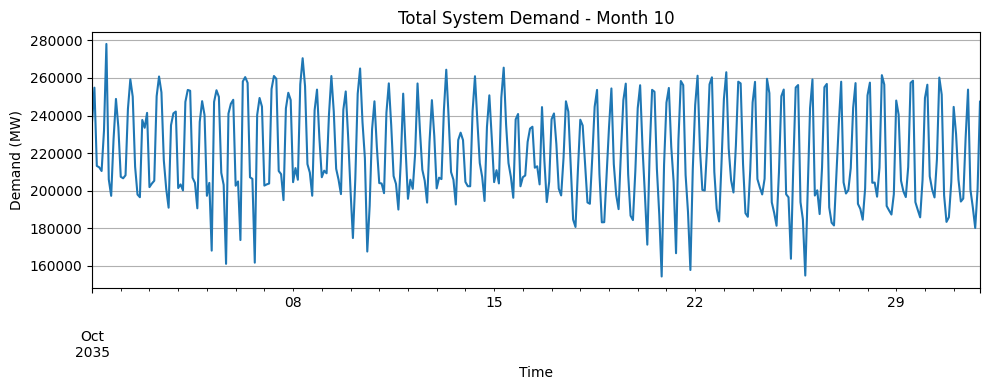

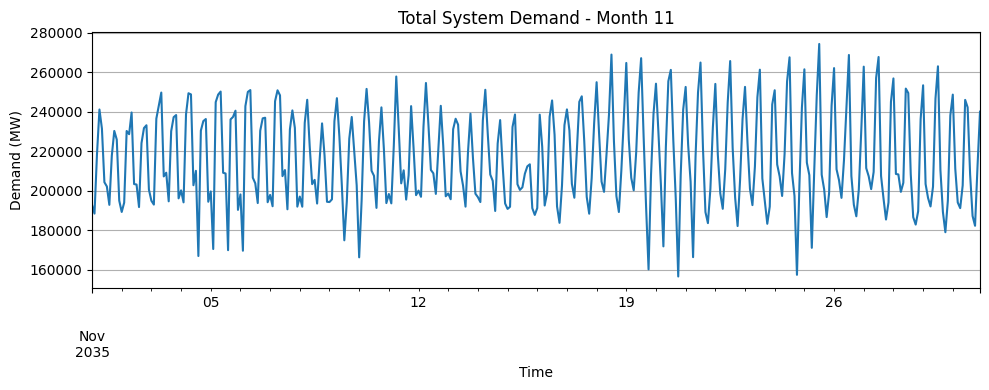

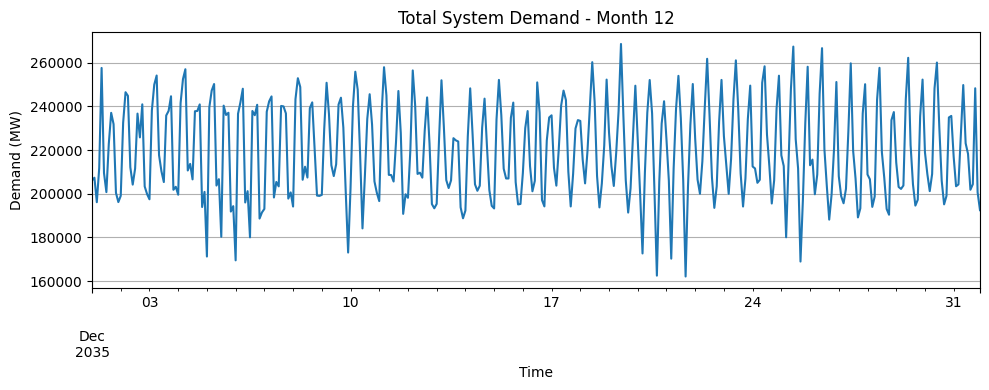

In [4]:
n = pypsa.Network()
n.import_from_netcdf(path="../FYP-TZ-APG-Hydrogen-Integration/TZ-APG v1/tz-apg-v1_scenario-bau.nc")

# User inputs
start_year = 2035
start_week = 1
period_length_weeks = 52  # how many weeks to include

# Get all snapshots for the chosen year
year_snapshots = [s for s in n.snapshots if s[0] == start_year]

# Filter snapshots within the chosen period
selected_snapshots = []
for s in year_snapshots:
    timestamp = pd.to_datetime(s[1])
    week_number = timestamp.isocalendar()[1]
    if start_week <= week_number < start_week + period_length_weeks:
        selected_snapshots.append(s)

print(selected_snapshots)

# Set the filtered snapshots
n.set_snapshots(pd.MultiIndex.from_tuples(selected_snapshots, names=['period', 'snapshot']))

# n.optimize(n.snapshots[::6]);  
# Get the demand/load time series
df = n.loads_t.p  # MW per load

total_demand = df.sum(axis=1)
total_demand.plot(figsize=(10, 4))
plt.title("Total System Demand")
plt.xlabel("Time")
plt.ylabel("Demand (MW)")
plt.grid(True)
plt.show()

# Compute total system demand
total_demand = df.sum(axis=1)

# Extract timestamps from MultiIndex
if isinstance(total_demand.index, pd.MultiIndex):
    timestamps = total_demand.index.get_level_values(1)  # second level is the actual timestamp
else:
    timestamps = total_demand.index

total_demand.index = pd.to_datetime(timestamps)

# Loop through each month and plot
for month in range(1, 13):
    monthly_demand = total_demand[total_demand.index.month == month]
    
    if monthly_demand.empty:
        continue  # skip months that have no data
    
    fig, ax = plt.subplots(figsize=(10, 4))
    monthly_demand.plot(ax=ax)
    
    ax.set_title(f"Total System Demand - Month {month}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Demand (MW)")
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()